In [ ]:
# David H. Nguyen, PhD. TSG Lab
# Last updated 3/8/25


In [ ]:
# Instructions
# The input csv file should be formatted as in the picture. 
# First column must be named "Category" and contain category labels that will be color-coded in the graph.
# Second column must be named "SampleName" and contain the sample names. 
# The features on which PCA will be done are in the 3rd column and to the end. 

# This script produces a file called "1st3PCvalues.csv" that contains the sample names PC values for the first 3 PCs. 
#    This is so you can graph the PCA results in an interactive 3D dotplot.



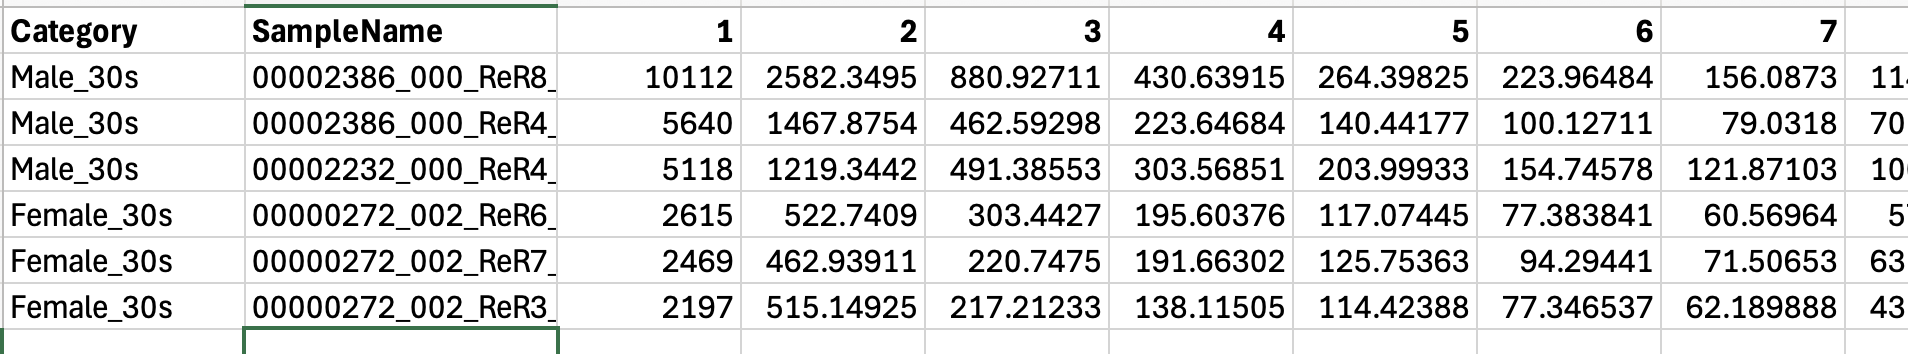


In [1]:
# Load the dependencies

import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [17]:
# Set the working directory
os.chdir("/Users/davidnguyen/Downloads/")  # Update with your file path

# Load the CSV file
file_path = "Male-v-Female_20s_at-scale_forPCA.csv"  # Update with the actual file path
df = pd.read_csv(file_path)

df.head()


,Category,SampleName,1,2,3,4,5,6,7,8,...,50,51,52,53,54,55,56,57,58,59
0,Male_20s,00000922_000_ReR7_Trim1pix_100pixel_Thicken_ro...,2615,572.149553,258.786003,166.046295,122.592888,92.107320,68.708732,50.344382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Male_20s,00001277_001_ReR6_Trim1pix_100pixel_Thicken_ro...,1731,357.354145,150.900729,99.804062,73.594386,53.775974,46.938301,44.676030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male_20s,00000522_004_ReR3_Trim1pix_100pixel_Thicken_ro...,1512,432.481943,117.905680,73.030725,53.113087,44.426628,39.698866,36.394877,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Male_20s,00001812_001_ReR3_Trim1pix_100pixel_Thicken_ro...,1839,447.780155,160.151600,89.875169,64.180930,53.660730,40.590158,40.815030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male_20s,00001517_008_ReR6_Trim1pix_100pixel_Thicken_ro...,2885,690.301231,301.776126,149.655056,92.945159,66.378574,51.261129,39.635891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:

# Ensure the expected columns exist
if "Category" not in df.columns or "SampleName" not in df.columns:
    raise ValueError("Input data must have 'Category' as the first column and 'SampleName' as the second column.")

# Extract category and sample name columns
categories = df["Category"]
sample_names = df["SampleName"]

# Select numerical features starting from the 3rd column onward
features = df.iloc[:, 2:]  

# Fill empty cells with zeros
features = features.fillna(0)

In [21]:

# Perform PCA with 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(features)

# Create a DataFrame for the first three principal components and add category & sample names
pc_df = pd.DataFrame(principal_components, columns=["PC1", "PC2", "PC3"])
pc_df.insert(0, "Category", categories)  # Add category as the first column
pc_df.insert(1, "SampleName", sample_names)  # Add sample names as the second column

# Save the table to a CSV file
pc_df.to_csv("1st3PCvalues.csv", index=False)  # Save without the default index



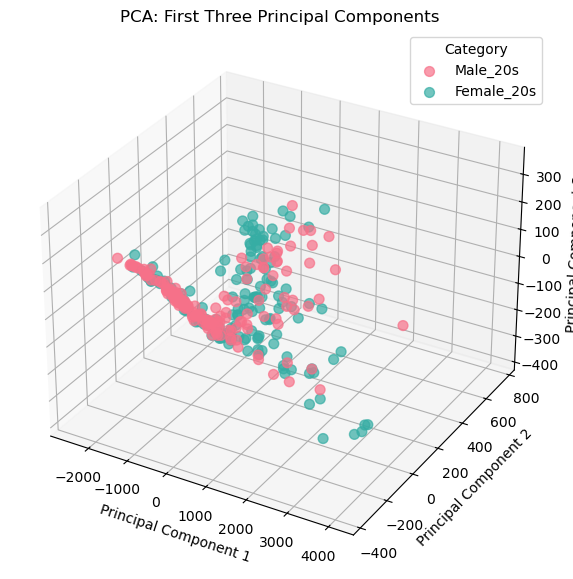

In [23]:
# Create a 3D scatter plot with categories as colors
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Assign unique colors to each category
unique_categories = categories.unique()
palette = sns.color_palette("husl", len(unique_categories))  # Generate distinct colors
color_map = {category: palette[i] for i, category in enumerate(unique_categories)}

# Plot each point with its corresponding category color
for category in unique_categories:
    subset = pc_df[pc_df["Category"] == category]
    ax.scatter(subset["PC1"], subset["PC2"], subset["PC3"], 
               label=category, alpha=0.7, s=50, c=[color_map[category]])

# Labels, title, and legend
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("PCA: First Three Principal Components")
ax.legend(title="Category")  # Show category legend

# Show plot
plt.show()